# 2. OR Gate using Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setting up initial parameters

In [2]:
# Data for OR gate
train_x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
train_y = np.array([0, 1, 1, 1])
# Initial weights
w = np.array([0.1, 0.2, 0.5])

eta = 0.1        # Learning rate

threshold = 0.5     # Threshold

## Sigmoid and Classification functions

In [3]:
# Sigmoid function
def sigmoid_func(x):
    return 1 / (1 + 2.71828 ** -x)

# Classify function
def classify(val):
    if val > threshold:
        return 1
    else:
        return 0

### Plotting the data

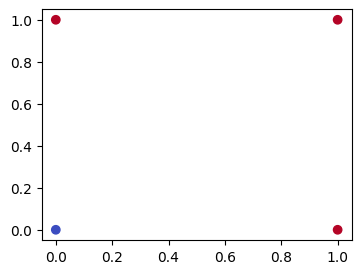

In [4]:
# Plot the graph of input data
plt.figure(figsize=(4, 3)) 
plt.scatter(train_x[0], train_x[1], c=train_y, cmap='coolwarm')

## Cost Function and Gradient Calculation

In [5]:
# Compute the cost function for logistic regression
def cost_function(w, x, y):
    m = len(y)
    h = sigmoid_func(w[0]+w[1]*x[0]+w[2]*x[1])
    return (-1/m) * np.sum(y * np.log(h) + (1 - y)*(np.log(1 - h))) 

In [6]:
# Compute the gradient of the cost function
def compute_gradient(w, x, y):
    m = len(y)
    h = sigmoid_func(w[0]+w[1]*x[0]+w[2]*x[1])
    w0 = (1/m) * np.sum(h - y)
    w1 = (1/m) * np.sum((h - y) * x[0])
    w2 = (1/m) * np.sum((h - y) * x[1])
    return np.array([w0, w1, w2])
    

## Applying Gradient Descent

In [7]:
# Apply gradient descent
def gradient_descent(w, x, y, eta, iterations = 1000):
    for i in range(iterations):
        w = w - eta * compute_gradient(w, x, y)
    return w

In [8]:
# Train the model
w = gradient_descent(w, train_x, train_y, eta, iterations=500)
print(w)

[-0.83677809  2.88007156  2.93673641]


## Testing the model

In [9]:
# Make predictions
predictions = []
for i in range(len(train_y)):
    predictions.append(classify(sigmoid_func(w[0]+w[1]*train_x[0][i]+w[2]*train_x[1][i])))
print(predictions)

[0, 1, 1, 1]


## Plotting the decision boundary

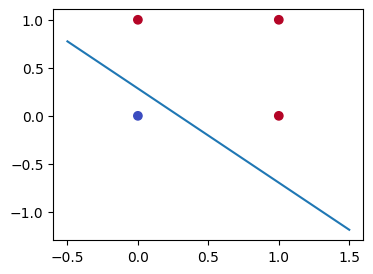

In [10]:
# Plot predictions of AND gate and draw the linearly separable line
plt.figure(figsize=(4, 3))
plt.scatter(train_x[0], train_x[1], c=predictions, cmap='coolwarm')
x = np.linspace(-0.5, 1.5, 100)
y = -w[0]/w[2] + (-w[1]/w[2]) * x   # m = -w[1]/w[2], c = -w[0]/w[2]
# -ve sign is used because the y-axis is inverted in matplotlib
plt.plot(x, y)
plt.show()

### 

## Finding the Accuracy

In [11]:
# Find the accuracy of the model
accuracy = np.sum(predictions == train_y) / len(train_y)
print('Accuracy:', accuracy)

Accuracy: 1.0


## Weights

In [12]:
print('Cost:', cost_function(w, train_x, train_y))
print("Weights:", w)


Cost: 0.15102051212342457
Weights: [-0.83677809  2.88007156  2.93673641]
